# Base de Dados CIFAR
#### A base de dados CIFAR é utilizada para classificação de 10 classes, ou seja: avião, automóvel, pássaro, gato, veado, cachorro, sapo, cavalo, navio e caminhão.

### Importação das Bibliotecas

In [1]:
# importando da biblioteca matplotlib do python
import matplotlib.pyplot as plt

# importando da biblioreca keras do python
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

### Carregando a Base de Dados

In [2]:
# separando a base de dados em treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

### Visualizando a Base de Dados

Text(0.5, 1.0, 'Classe [0]')

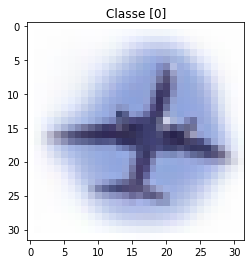

In [3]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[650])
plt.title('Classe ' + str(y_treinamento[650]))

Text(0.5, 1.0, 'Classe [2]')

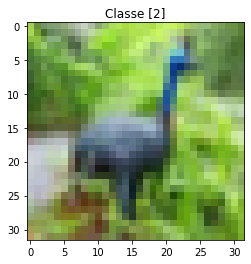

In [4]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[6])
plt.title('Classe ' + str(y_treinamento[6]))

Text(0.5, 1.0, 'Classe [3]')

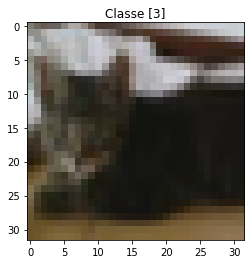

In [5]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[9])
plt.title('Classe ' + str(y_treinamento[9]))

Text(0.5, 1.0, 'Classe [4]')

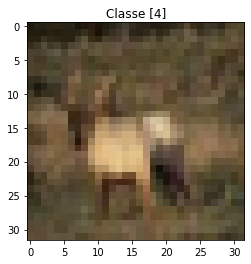

In [6]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[3])
plt.title('Classe ' + str(y_treinamento[3]))

Text(0.5, 1.0, 'Classe [5]')

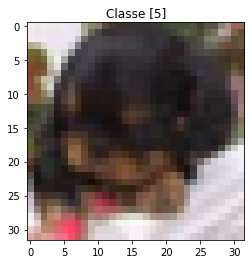

In [7]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[813])
plt.title('Classe ' + str(y_treinamento[813]))

Text(0.5, 1.0, 'Classe [6]')

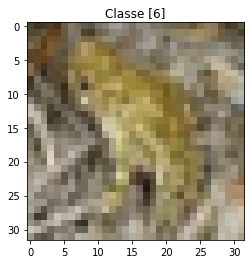

In [8]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[651])
plt.title('Classe ' + str(y_treinamento[651]))

Text(0.5, 1.0, 'Classe [7]')

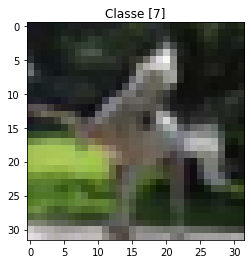

In [9]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[652])
plt.title('Classe ' + str(y_treinamento[652]))

Text(0.5, 1.0, 'Classe [8]')

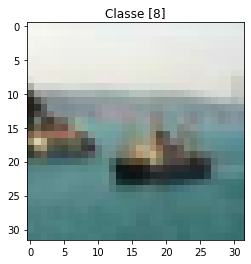

In [10]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[811])
plt.title('Classe ' + str(y_treinamento[811]))

Text(0.5, 1.0, 'Classe [9]')

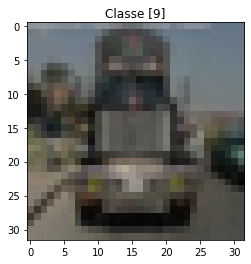

In [11]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[970])
plt.title('Classe ' + str(y_treinamento[970]))

Text(0.5, 1.0, 'Classe [1]')

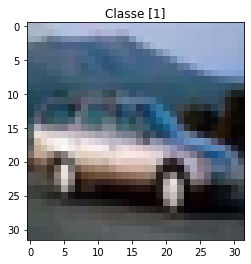

In [12]:
# visualizando algumas imagens armazenadas nos dados
plt.imshow(X_treinamento[4])
plt.title('Classe ' + str(y_treinamento[4]))

In [13]:
# visualizando o formato das classes 
print(y_treinamento)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


### Pré-processando a Imagem




In [14]:
# visualizando s dimensões das imagens
print(X_treinamento.shape)

(50000, 32, 32, 3)


In [15]:
# visualizando as dimensões das classes
print(y_treinamento.shape)

(50000, 1)


In [16]:
# as dimensões das imagens são 3x3. Além disso, devemos considerá-la
# colorida. Desse modo, ela possuirá 3 camadas (RGB)
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 32, 32, 3)
previsores_teste = X_teste.reshape(X_teste.shape[0], 32, 32, 3)

In [17]:
# convertendo os dados do píxel para números flutuantes,
# garantindo que os dados possam ser normalizados
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [18]:
# aplicando uma normalização nos dados para auxiliar no processamento
# da rede neural
previsores_treinamento /= 255
previsores_teste /= 255

In [19]:
# transformando os atributos categóricos da classe em variáveis
# do tipo dummy
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

### Estrutura da Rede Neural

In [20]:
# criando o objeto classificador
classificador = Sequential()
# adicionando uma camada de convolução
classificador.add(Conv2D(32, (3,3), input_shape = (32, 32, 3), activation = 'relu'))
# aplica a normalização nas imagens para a próxima camada
classificador.add(BatchNormalization())
# maximizando o mapa de características das imagens
classificador.add(MaxPooling2D(pool_size = (2,2)))

# adicionando uma camada de convolução
classificador.add(Conv2D(32, (3,3), activation = 'relu'))
# aplica a normalização nas imagens para a próxima camada
classificador.add(BatchNormalization())
# maximizando o mapa de características das imagens
classificador.add(MaxPooling2D(pool_size = (2,2)))

# aplicando uma transformação linear nas imagente, de modo
# que elas se tornem com uma única dimensão
classificador.add(Flatten())

# adicionando uma camada densa a rede neural
classificador.add(Dense(units = 128, activation = 'relu'))
# Adicionando uma camada de dropout para reduzir o overfiting
classificador.add(Dropout(0.2))
# adicionando uma camada densa a rede neural
classificador.add(Dense(units = 128, activation = 'relu'))
# Adicionando uma camada de dropout para reduzir o overfiting
classificador.add(Dropout(0.2))

# adicionando uma camada de saída a rede neural
classificador.add(Dense(10, activation = 'softmax'))

# configurando mais alguns parâmetros da rede neural
classificador.compile(loss = 'categorical_crossentropy',
                     optimizer = 'adam', metrics = ['accuracy'])

### Treinando a Rede Neural

In [21]:
# realizando o treinamento na rede neural
classificador.fit(previsores_treinamento, classe_treinamento,
                 batch_size = 128, epochs = 10,
                 validation_data = (previsores_teste, classe_teste),
                 verbose = True)

Epoch 1/10
391/391 [==============================] - 67s 172ms/step - loss: 1.5387 - accuracy: 0.4488 - val_loss: 1.7319 - val_accuracy: 0.3670
Epoch 2/10
391/391 [==============================] - 66s 170ms/step - loss: 1.1506 - accuracy: 0.5907 - val_loss: 1.2454 - val_accuracy: 0.5572
Epoch 3/10
391/391 [==============================] - 67s 172ms/step - loss: 0.9962 - accuracy: 0.6490 - val_loss: 1.0885 - val_accuracy: 0.6170
Epoch 4/10
391/391 [==============================] - 67s 171ms/step - loss: 0.8988 - accuracy: 0.6866 - val_loss: 1.0240 - val_accuracy: 0.6267
Epoch 5/10
391/391 [==============================] - 65s 167ms/step - loss: 0.8130 - accuracy: 0.7163 - val_loss: 1.0642 - val_accuracy: 0.6343
Epoch 6/10
391/391 [==============================] - 65s 167ms/step - loss: 0.7473 - accuracy: 0.7377 - val_loss: 0.9154 - val_accuracy: 0.6776
Epoch 7/10
391/391 [==============================] - 65s 167ms/step - loss: 0.6945 - accuracy: 0.7558 - val_loss: 0.8167 - val_ac